In [6]:
import pandas as pd

df = pd.read_csv("7282_1_dedupe.csv", low_memory=False)

def missing_pct(df, cols, title=None, round_to=2, sort_desc=True):
    pct = (df[cols].isna().mean() * 100).round(round_to)
    if sort_desc: pct = pct.sort_values(ascending=False)
    if title: 
        print(f"\n--- {title}: % missing by column ---")
        print(pct.to_string())
    return pct.rename('% Missing')

# COLUMN GROUPS
first6  = df.columns[:6]
second6 = df.columns[6:12]
last6   = [
    'reviews.rating','reviews.text','reviews.title',
    'reviews.userCity','reviews.username','reviews.userProvince'
]

# Run per group (prints percentages only)
p1 = missing_pct(df, first6,  title='First 6 columns')
p2 = missing_pct(df, second6, title='Second 6 columns')
p3 = missing_pct(df, last6,   title='Last 6 columns')





--- First 6 columns: % missing by column ---
latitude      0.24
longitude     0.24
categories    0.00
address       0.00
country       0.00
city          0.00

--- Second 6 columns: % missing by column ---
reviews.doRecommend    100.00
reviews.date             0.72
postalCode               0.15
name                     0.00
province                 0.00
reviews.dateAdded        0.00

--- Last 6 columns: % missing by column ---
reviews.userCity        54.71
reviews.userProvince    51.21
reviews.title            4.53
reviews.rating           2.40
reviews.username         0.12
reviews.text             0.07


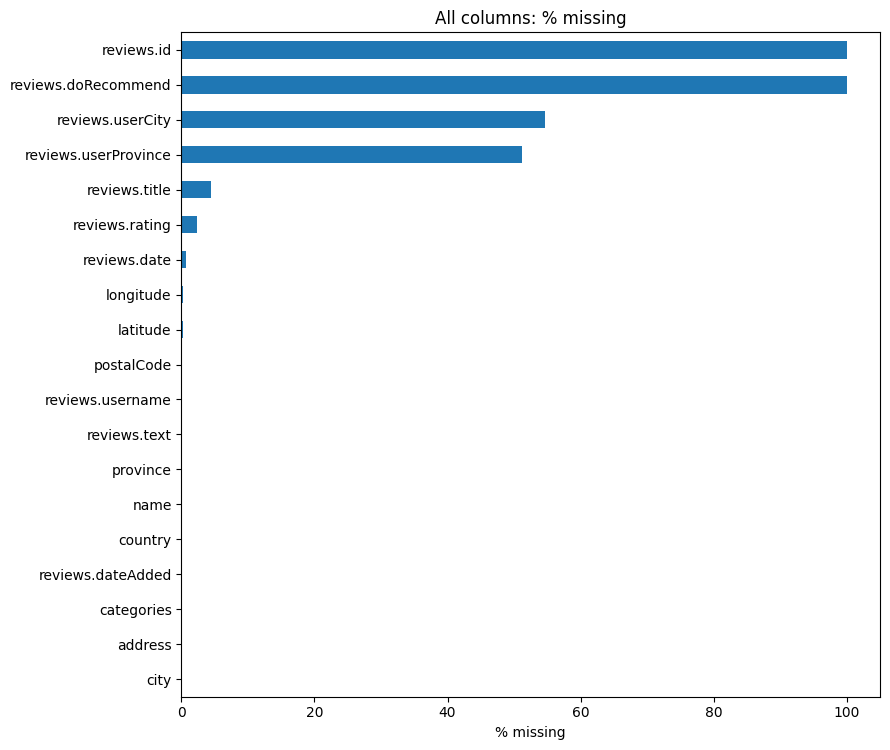

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

def missing_summary(df, cols=None):
    cols = df.columns if cols is None else cols
    miss_ct = df[cols].isna().sum()
    miss_pct = (miss_ct/len(df))*100
    return (pd.DataFrame({"missing_count": miss_ct, "missing_pct": miss_pct})
              .sort_values("missing_pct", ascending=False))

def plot_missing_bar(df, cols=None, title="Missingness by column (% of rows)"):
    s = missing_summary(df, cols)["missing_pct"].sort_values()
    h = max(4, 0.4*len(s))  # height scales with number of columns
    ax = s.plot(kind="barh", figsize=(9, h))
    ax.set_xlabel("% missing")
    ax.set_ylabel("")
    ax.set_title(title)
    plt.tight_layout()
    plt.show()


plot_missing_bar(df, title="All columns: % missing")


#### FEATURE SELECTION

#### Features dropped ( with around 100% or < 60%  missing values )
reviews.id, reviews.doRecommend, reviews.userCity, reviews.userProvince

